In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('oct_2019 MELT.csv') #CHANGE FILE AND SHEET NAMES
df2 = pd.read_excel('regionMapping.xlsx', sheet_name='regionMapping') #CHANGE FILE AND SHEET NAMES
df3 = pd.read_excel('regionMapping2.xlsx', sheet_name='regionMapping') #CHANGE FILE AND SHEET NAMES


df = pd.read_csv('oct_2019 MELT.csv') #melted file names
print(df.columns)

df = df.loc[df['Desk'] == '1']
df = df.loc[df['Date'] == '2019-10-01']
print(df)


                   
#df['Flight_ID'] = df[]

Index(['Unnamed: 0', 'Flt', 'Org', 'Dst', 'Eqt', 'Dptr', 'Arvl', 'BLK MINS',
       'MILES', 'Desk', 'Day', 'Schd', 'Month', 'Year', 'Date', 'Dept Time',
       'Arr Time', 'Rls Time', 'Rls HR', 'Dept HR', 'Arr HR'],
      dtype='object')
    Unnamed: 0   Flt  Org  Dst  Eqt      Dptr      Arvl  BLK MINS  MILES Desk  \
0            0    68  PDX  SLC  739  20:13:00  21:58:00       105    630    1   
1            2   367  DEN  LAX  319  18:06:00  20:37:00       151    862    1   
2            3   367  LAX  DEN  319  15:00:00  17:19:00       139    862    1   
3            4   473  LAX  PDX  319  16:05:00  18:31:00       146    834    1   
4            5   473  PDX  LAX  319  19:25:00  21:40:00       135    834    1   
..         ...   ...  ...  ...  ...       ...       ...       ...    ...  ...   
61          83  2887  DEN  SEA  319  23:00:00  01:57:00       177   1024    1   
62          84  2889  SLC  SEA  738  02:35:00  04:50:00       135    689    1   
63          85  2901  DEN  SLC  

In [65]:
event_hours = pd.DataFrame(columns = [i for i in range(0, 24)])
print(event_hours)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Index: []

[0 rows x 24 columns]


In [66]:
for i in range(len(df)):
    row = df.iloc[i]
    rls_hr = row['Rls HR']
    dep_hr = row['Dept HR']
    arr_hr = row['Arr HR']
    mon_hrs = [hr for hr in range(dep_hr + 1, arr_hr)]
    
    #print(mon_hrs)
    #print(rls_hr, arr_hr, dep_hr)
    
    hours_list = [0 for num in range(0, 24)]
    #print(hours_list)
    hours_list[rls_hr] = 'R'
    hours_list[dep_hr] = 'D'
    hours_list[arr_hr] = 'A'
    for hr in mon_hrs:
        hours_list[hr] = 'M'
        
    #print(hours_list)

    event_hours.loc[i] = hours_list
print(event_hours)

   0  1  2  3  4  5  6  7  8  9   ... 14 15 16 17 18 19 20 21 22 23
0   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  R  0  D  A  0  0
1   0  0  0  0  0  0  0  0  0  0  ...  0  0  R  0  D  M  A  0  0  0
2   0  0  0  0  0  0  0  0  0  0  ...  0  D  M  A  0  0  0  0  0  0
3   0  0  0  0  0  0  0  0  0  0  ...  R  0  D  M  A  0  0  0  0  0
4   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  R  0  D  M  A  0  0
.. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
61  0  A  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  R  0  D
62  0  R  D  M  A  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
63  0  0  0  0  0  0  0  0  0  0  ...  A  0  0  0  0  0  0  0  0  0
64  0  0  0  0  0  0  0  0  0  0  ...  0  R  0  D  M  A  0  0  0  0
65  R  0  D  M  A  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0

[66 rows x 24 columns]


In [70]:
# CHANGE THESE TIMES LATER

rls_time = 5
dep_time = 2
arr_time = 4
mon_time = 2

x = list((event_hours.columns))
time_worked = []
num_rls = []
for hr in x:
    counts = event_hours[hr].value_counts()

    if 'A' in counts:
        counts_A = counts['A']
    else:
        counts_A = 0
        
    if 'R' in counts:
        counts_R = counts['R']
    else:
        counts_R = 0
        
    if 'D' in counts:
        counts_D = counts['D']
    else:
        counts_D = 0
        
    if 'M' in counts:
        counts_M = counts['M']
    else:
        counts_M = 0
        
    num_rls.append(counts_R)
        
    total_time = rls_time*counts_R + dep_time*counts_D + arr_time*counts_A + mon_time*counts_M
    time_worked.append(total_time)

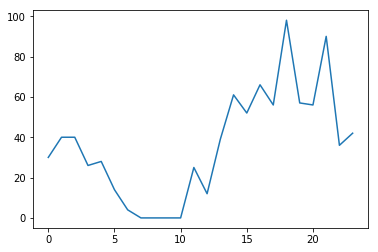

In [69]:
# Workload Distribution over Shift

plt.plot(x, time_worked)

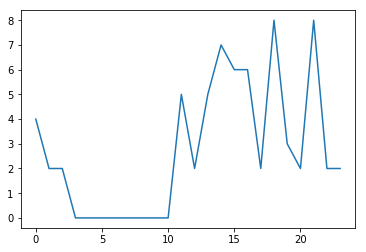

In [71]:
# Number of Releases per Hours

plt.plot(x, num_rls)